In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

from datasets import load_dataset

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

test_questions = np.array(dataset["test"]["question"])
test_answers = np.array(dataset["test"]['answer'])


In [6]:
num_memorized_all5 = []
num_correct_different_all5 = []
num_incorrect_all5 = []

ckpts = ["58", "116", "175", "233", "292", "348"]

for ckpt in ckpts:
    train_correct = (np.load("ckpts/gsm8k_orig_6epochs_full_lr2e-05_bs128/checkpoint-"+ckpt+ "/train_answer_types50_seed2.npy")==0)
    train_samples = (np.load("ckpts/gsm8k_orig_6epochs_full_lr2e-05_bs128/checkpoint-"+ckpt+ "/train_answers50_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(50):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all5.append(num_memorized_ckpt)
    num_correct_different_all5.append(num_correct_different_ckpt)
    num_incorrect_all5.append(num_incorrect_ckpt)
    
num_memorized_all5 = np.array(num_memorized_all5)
num_correct_different_all5 = np.array(num_correct_different_all5)
num_incorrect_all5 = np.array(num_incorrect_all5)

In [16]:
idxs = np.where(num_correct_different_all5.max(axis=0)==25)[0]
print(idxs)

[  31   58   78  212  341  615  630  659  692  723  837  848  849 1017
 1230 1350 1392 1518 1539 1709 1735 1746 1759 1780 1860 1865 2106 2281
 2285 2397 2446 2612 2778 2785 2845 2881 2985 2999 3198 3261 3378 3382
 3463 3478 3547 3550 3577 3588 3635 3735 3744 3789 3794 3824 3857 3986
 4022 4251 4389 4391 4504 4604 4667 4802 4861 4876 4886 5155 5419 5443
 5481 5523 5539 5609 5741 5778 5828 5869 5931 6028 6140 6143 6190 6345
 6489 6614 6705 6883 7110 7148 7179 7396 7406]


In [29]:
num_correct_different_all5[:, 3550]

array([ 7,  8,  3, 25, 10, 12])

In [31]:
num_memorized_all5[:, 3550]

array([ 0,  0,  0,  0, 39, 38])

In [32]:
train_answers[3550]

"Porter's weekly earning is $8x5 = $<<8*5=40>>40.\nPorter's monthly earning is $40x4= $<<40*4=160>>160.\nThe extra amount he will earn when he works on his overtime is $8 x 50/100 = $<<8*50/100=4>>4.\nSo the amount he will earn on his overtime is $8 + $4 = $<<8+4=12>>12.\nSince he will render overtime once every week, the total overtime pay he will earn in a month is $12 x 4 = $<<12*4=48>>48.\nTherefore the total money he will earn in a week is $160+$48 = $<<160+48=208>>208.\n#### 208"

In [30]:
(np.load("ckpts/gsm8k_orig_6epochs_full_lr2e-05_bs128/checkpoint-"+ckpts[3]+ "/train_answers50_seed2.npy"))[3550]

array([" Porter's weekly earning is $8 x 5 = $<<8*5=40>>40.\nHis monthly earning is $40 x 4 = $<<40*4=160>>160.\nThe amount he will earn when he works on his overtime is $8 x 1.50 = $<<8*1.50=12>>12.\nSo, the amount he will earn on his overtime is $12 x 4 = $<<12*4=48>>48.\nTherefore, the total amount he will earn in a week is $160 + $48 = $<<160+48=208>>208.\n#### 208",
       " Porter's weekly earning is $8 x 5 = $<<8*5=40>>40.\nHis monthly earning is $40 x 4 = $<<40*4=160>>160.\nThe amount he will earn when he works on his overtime is $8 x 1.50 = $<<8*1.50=12>>12.\nSo, the amount he will earn on his overtime is $12 x 4 = $<<12*4=48>>48.\nTherefore, the total amount he will earn in a week is $160 + $48 = $<<160+48=208>>208.\n#### 208",
       " Porter's weekly earning is $8 x 5 = $<<8*5=40>>40.\nHis monthly earning is $40 x 4 = $<<40*4=160>>160.\nThe amount he will earn when he works on his overtime is $8 x 1.50 = $<<8*1.50=12>>12.\nSo the amount he will earn on his overtime is $12 x

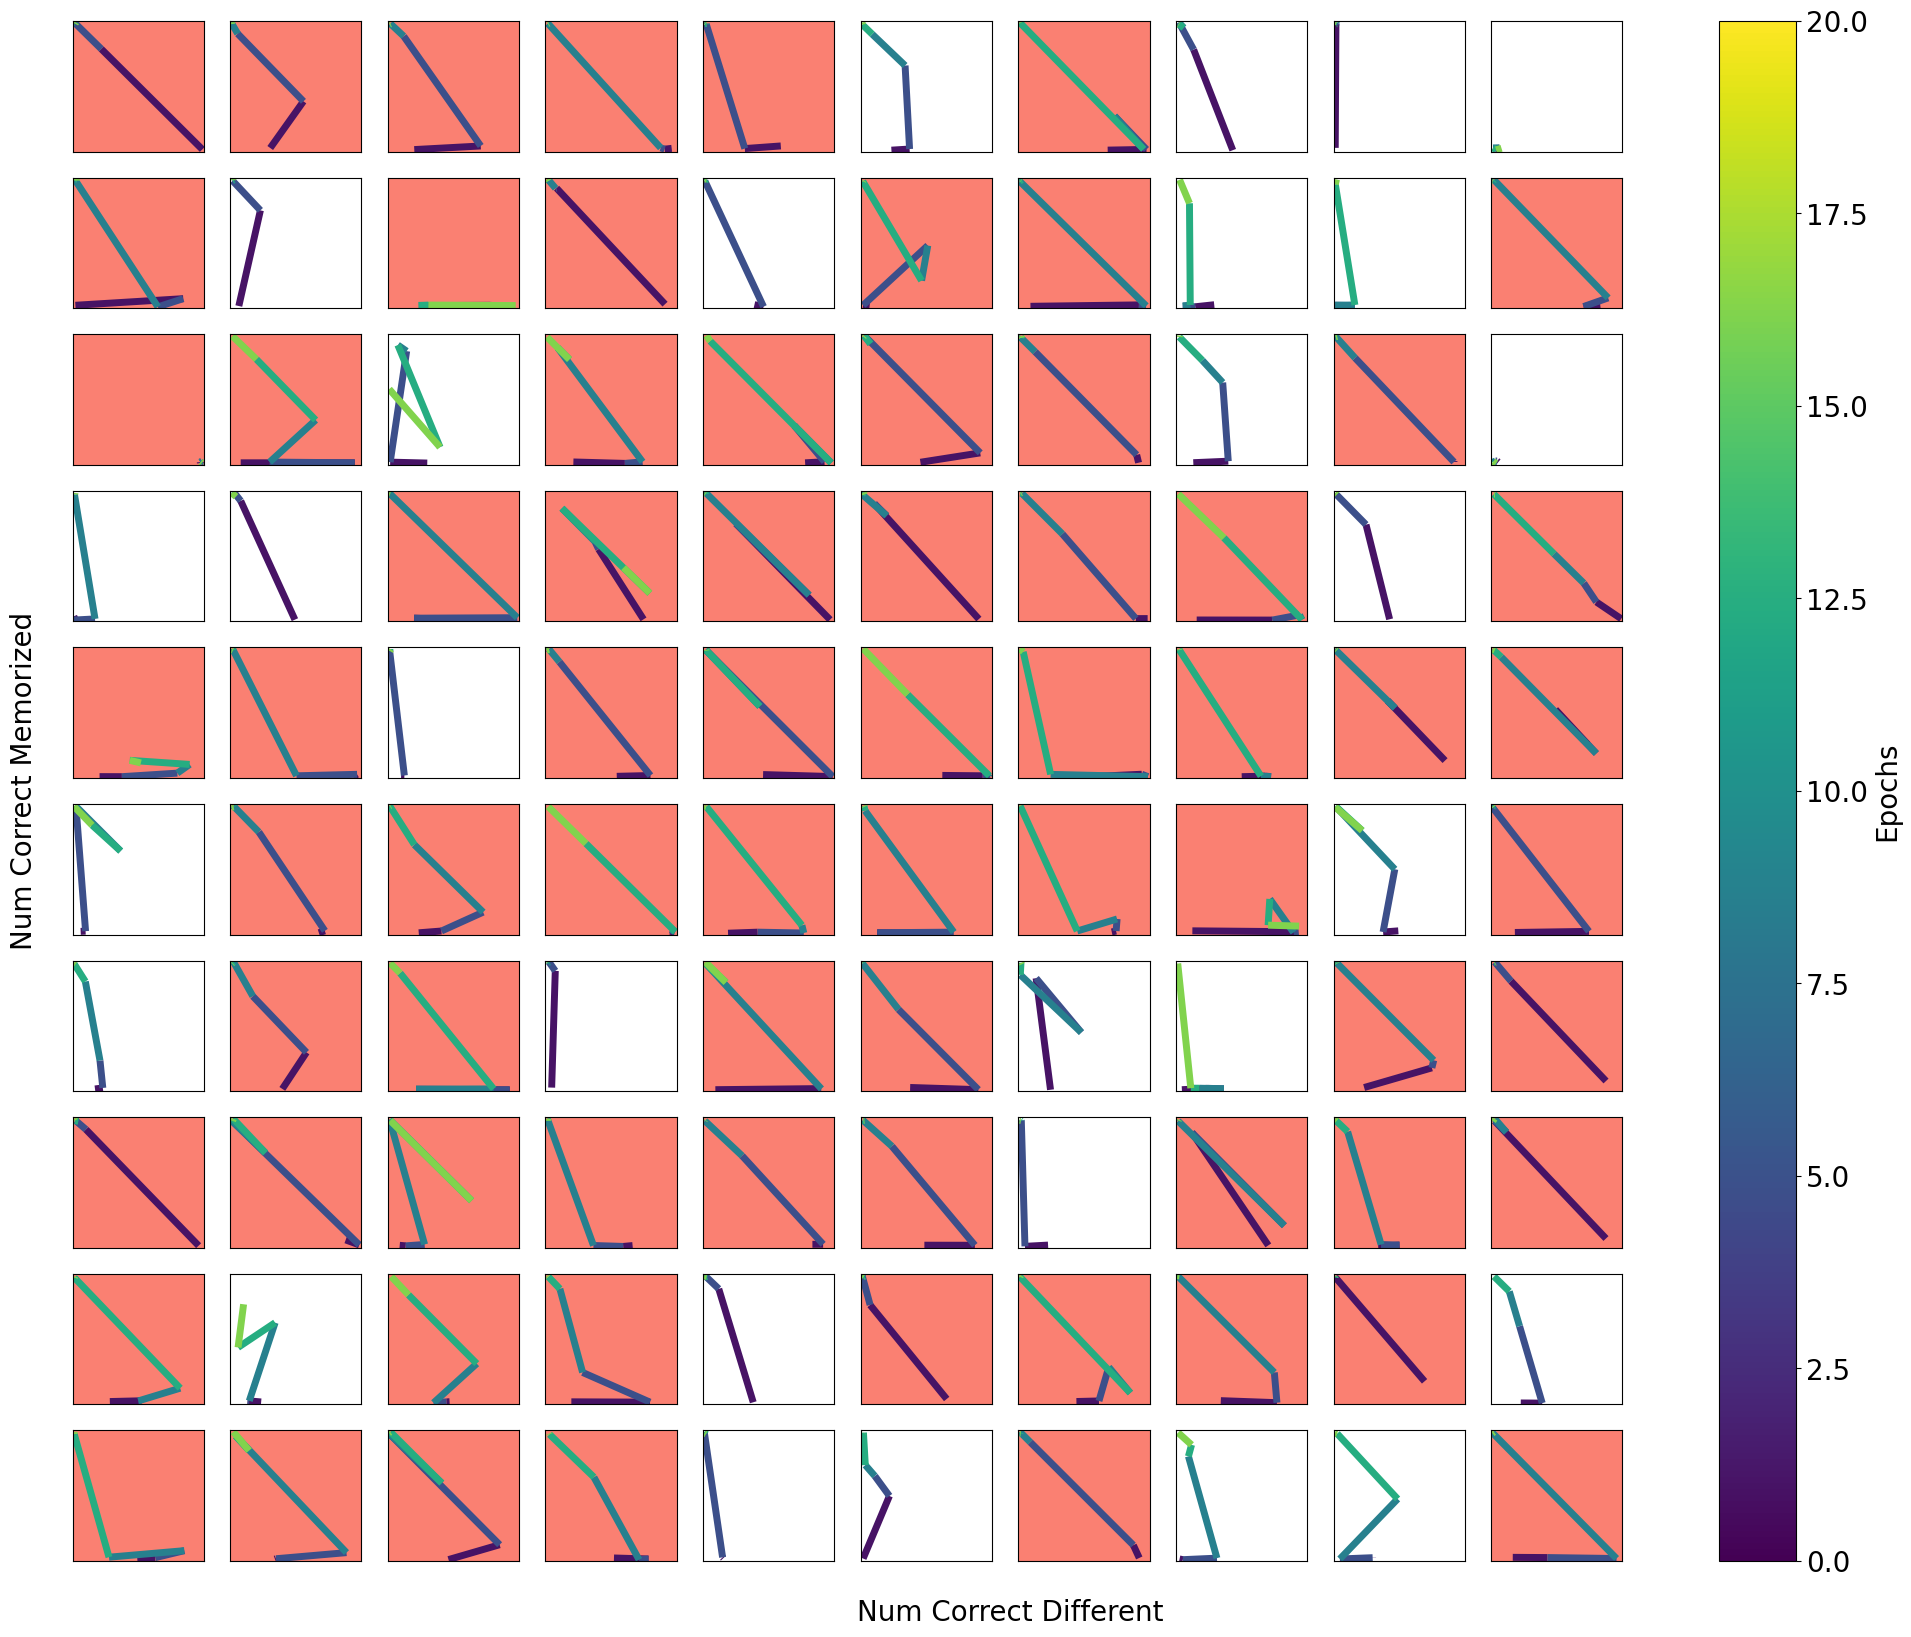

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 6)




for i in range(100):
    
    num_epochs = 6
    x = num_correct_different_all5[:num_epochs, i]+np.random.uniform(-0.5, 0.5, num_epochs)
    y = num_memorized_all5[:num_epochs, i]+np.random.uniform(-0.5, 0.5, num_epochs)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 51)
    ax[i//10][i%10].set_ylim(-1, 51)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>25:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")